In [3]:
import os,sys

parent = os.path.dirname(os.getcwd())
if parent not in sys.path:
    sys.path.append(parent)
print(parent)
%matplotlib widget

d:\Documents\git\XAI-Cancer-Diagnosis\XAI-Cancer-Diagnosis


In [4]:
# Data

from src.datasets.BACH import BACH
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import Compose, KNNGraph
import torch
import numpy as np


graph_aug_val = Compose([KNNGraph(k=6)])


print('CUDA available: ', torch.cuda.is_available())
print('CUDA device count: ', torch.cuda.device_count())

src_folder = os.path.join(
    "C://Users", "aless", "Documents", "FtT", "data", "BACH_TRAIN")
tid,vid = BACH.get_train_val_ids(src_folder,"graph_ind_FtT_19_11_dropout_3.txt")
train_set = BACH(src_folder,graph_augmentation=graph_aug_val,ids=tid,pre_encoded=True)
val_set = BACH(src_folder,graph_augmentation=graph_aug_val,ids=vid,pre_encoded=True)

train_loader = DataLoader(train_set, batch_size=1, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1, shuffle=False)

print(len(train_loader))
print(len(val_loader))

CUDA available:  True
CUDA device count:  1
309
76


In [5]:
from src.utilities.pyg import extract_graph

train_sample = extract_graph(next(iter(train_loader)),0)
train_sample

Data(x=[539, 312], edge_index=[2, 3234], y=1, pos=[539, 2], original_image_path='C://Users\aless\Documents\FtT\data\BACH_TRAIN\Benign\b046.tif')

C://Users\aless\Documents\FtT\data\BACH_TRAIN\Benign\b046.tif


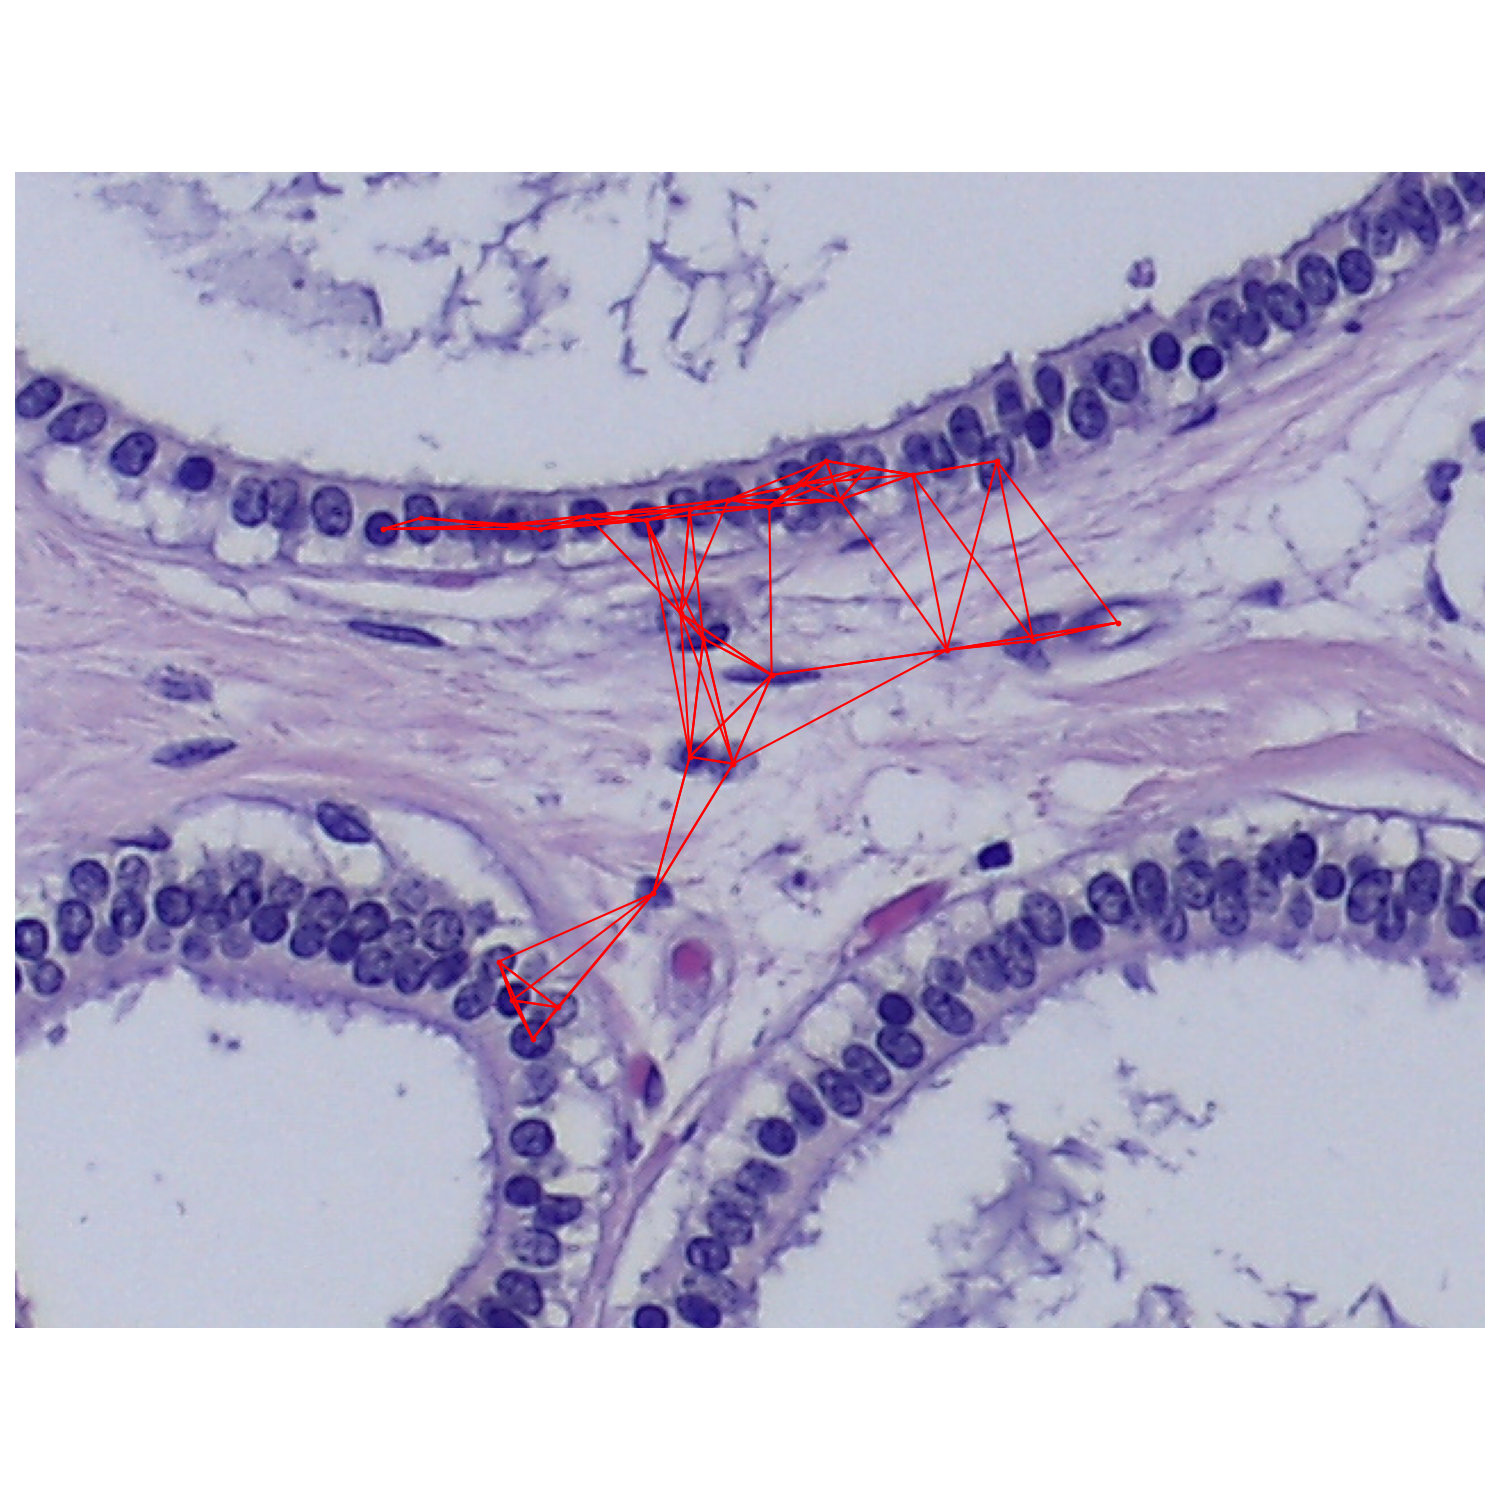

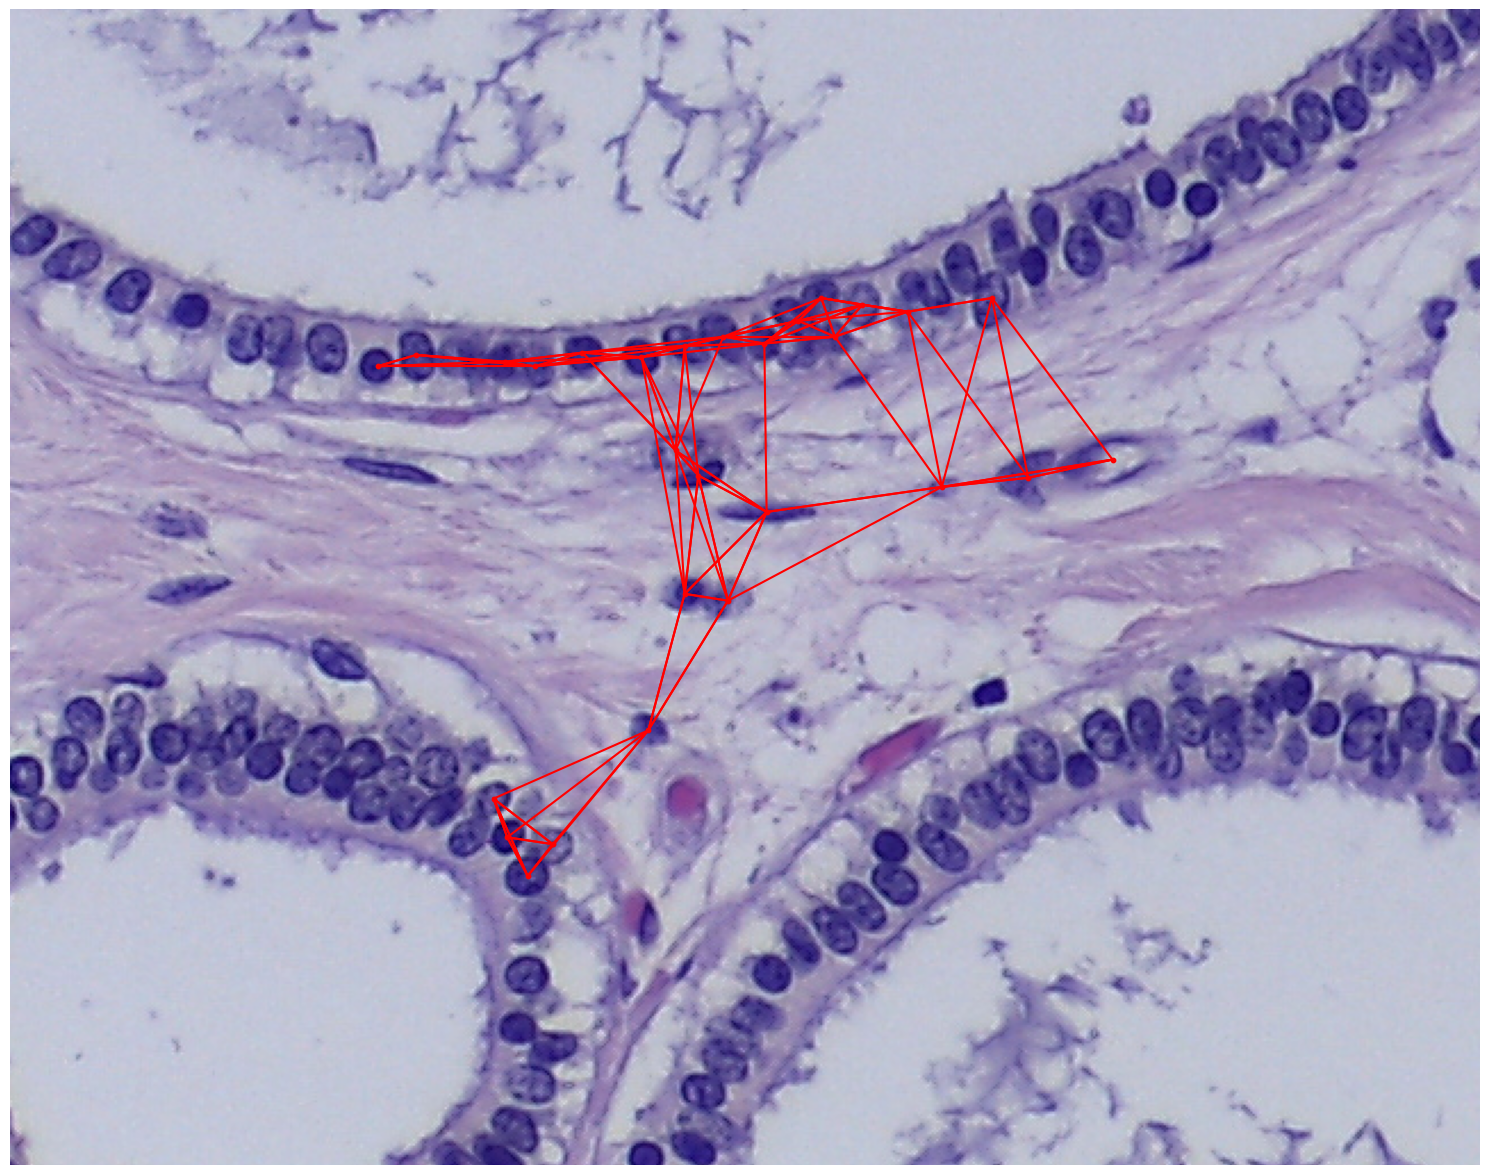

In [16]:
from torch_geometric.data import Data
from torch_geometric.utils import k_hop_subgraph,subgraph
import matplotlib.pyplot as plt


def plot_graph_over_img(graph:Data,node_colours =None, crop_factor=64, crop_around_nodes=True):
    plt.figure(figsize=(15,15))
    # Load the tif image
    img = plt.imread(graph.original_image_path)
    # Crop the image
    img = img[crop_factor:-crop_factor,crop_factor:-crop_factor,:]
    # Plot the image
    plt.imshow(img)
    
    # On top, plot each node & edge
    # Plot the nodes
    
    plt.scatter(graph.pos[:,0],graph.pos[:,1],s=10,c='r' if node_colours is None else node_colours)
    # Plot the edges
    for edge in graph.edge_index.T:
        plt.plot(graph.pos[edge,0],graph.pos[edge,1],c='r')
        
    # Zoop into just the nodes
    if crop_around_nodes:
        # Get the min and max of the nodes
        min_x = graph.pos[:,0].min()
        max_x = graph.pos[:,0].max()
        min_y = graph.pos[:,1].min()
        max_y = graph.pos[:,1].max()
        # Get the center of the nodes
        center_x = (min_x+max_x)/2
        center_y = (min_y+max_y)/2
        # Get the width of the nodes
        width = max_x-min_x
        height = max_y-min_y
        # Set the limits
        plt.xlim(center_x-width,center_x+width)
        plt.ylim(center_y-height,center_y+height)
        
    # Get rid of the axis
    plt.axis('off')
    # Turn to an img object
    plt.tight_layout()
    return plt.gcf()
    
    
def get_random_subgraph(graph:Data,n=3):
    # Get a random node id
    node_id = np.random.randint(0,graph.num_nodes)
    # Get the subgraph
    subset,edges,_,_ = k_hop_subgraph(node_id,n,graph.edge_index,relabel_nodes=True)
    # Create the subgraph
    subgraph = Data(x=graph.x[subset],edge_index=edges,pos=graph.pos[subset],original_image_path=graph.original_image_path)
    return subgraph


    
    
print(train_sample.original_image_path)
random_sub_graph = get_random_subgraph(train_sample,3)
plot_graph_over_img(random_sub_graph)
      